<a href="https://colab.research.google.com/github/meizzi04/OpenSource/blob/main/DataCrawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver/usr/bin

In [ ]:
# linkareer 텍스트 크롤링
# -*- coding: UTF-8 -*-
from pandas.io.formats.info import DataFrameTableBuilder
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from requests.cookies import RequestsCookieJar
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame

#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
 
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

html = urlopen("https://linkareer.com/cover-letter/search?keyword=IT&page=1&sort=RELEVANCE&tab=all")
bsObject = BeautifulSoup(html, "html.parser")

careers_dict = {}
idx = 0 # 현재 채용 정보의 번호

page_urls = []
page_table = []
page_data = []
url_list = []

url_in = "https://linkareer.com"

careers_dict = {}

for cur_page in range(58):
    url = "https://linkareer.com/cover-letter/search?keyword=IT&sort=RELEVANCE&tab=all&page=" + str(cur_page+1) 
    html = urlopen(url)
    bsObject = BeautifulSoup(html, "html.parser")

    jss = bsObject.find_all('div', 'jss194')

    for cp in jss:
        idx += 1

        # table = cp.find('a') # 사이트 제목
        link = cp.find('a')['href'] # 사이트 링크
        link = url_in + link

        driver.get(link)

        url_list.append(link)
        #print(link)

        try:
            data = driver.find_element(By.ID, 'coverLetterContent')
        except : 
            continue
        
        data.get_attribute('main')
        
        page_data.append(data.text.strip())

        print("자소서 #%d - " %idx , end = ' ')
        #print(table.text.lstrip())
        print(data.text)
        print("\n")
        print("=============================================================")
        print("\n")

career_df = pd.DataFrame(zip(page_data), columns = ['Data'])
print(career_df)
career_df.to_csv("linkareer_data.csv", mode="w",encoding='utf-8')

In [ ]:
# 워크넷 텍스트 크롤링
# -*- coding: UTF-8 -*-
from pandas.io.formats.info import DataFrameTableBuilder
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from requests.cookies import RequestsCookieJar
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame

#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
 
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

html = urlopen("https://www.work.go.kr/empInfo/empInfoSrch/list/dtlEmpSrchList.do?careerTo=&keywordJobCd=&occupation=024%7C025%7C026%7C023%7C022&templateInfo=&shsyWorkSecd=&rot2WorkYn=&payGbn=&resultCnt=50&keywordJobCont=N&cert=&cloDateStdt=&moreCon=&minPay=&codeDepth2Info=11000&isChkLocCall=&sortFieldInfo=DATE&major=&resrDutyExcYn=&eodwYn=&sortField=DATE&staArea=&sortOrderBy=DESC&keyword=&termSearchGbn=all&carrEssYns=&benefitSrchAndOr=O&disableEmpHopeGbn=&webIsOut=&actServExcYn=&maxPay=&keywordStaAreaNm=N&emailApplyYn=&listCookieInfo=DTL&pageCode=&codeDepth1Info=11000&keywordEtcYn=&publDutyExcYn=&keywordJobCdSeqNo=&exJobsCd=&templateDepthNmInfo=&computerPreferential=&regDateStdt=&employGbn=&empTpGbcd=&region=&infaYn=&resultCntInfo=50&siteClcd=all&cloDateEndt=&sortOrderByInfo=DESC&currntPageNo=1&indArea=&careerTypes=&searchOn=Y&tlmgYn=&subEmpHopeYn=&academicGbn=&templateDepthNoInfo=&foriegn=&mealOfferClcd=&station=&moerButtonYn=&holidayGbn=&srcKeyword=&enterPriseGbn=all&academicGbnoEdu=noEdu&cloTermSearchGbn=all&keywordWantedTitle=N&stationNm=&benefitGbn=&keywordFlag=&notSrcKeyword=&essCertChk=&isEmptyHeader=&depth2SelCode=&_csrf=3a6adaa3-773f-42a8-ab7f-d78aac19dc46&keywordBusiNm=N&preferentialGbn=&rot3WorkYn=&pfMatterPreferential=&regDateEndt=&staAreaLineInfo1=11000&staAreaLineInfo2=1&pageIndex=1&termContractMmcnt=&careerFrom=&laborHrShortYn=#viewSPL")
bsObject = BeautifulSoup(html, "html.parser")

careers_dict = {}
idx = 0 # 현재 채용 정보의 번호

page_urls = []
page_table = []
page_data = []

url_in = "https://www.work.go.kr"

careers_dict = {}

for cur_page in range(114):
    url = "https://www.work.go.kr/empInfo/empInfoSrch/list/dtlEmpSrchList.do?careerTo=&keywordJobCd=&occupation=024%7C025%7C026%7C023%7C022&templateInfo=&shsyWorkSecd=&rot2WorkYn=&payGbn=&resultCnt=50&keywordJobCont=N&cert=&cloDateStdt=&moreCon=&minPay=&codeDepth2Info=11000&isChkLocCall=&sortFieldInfo=DATE&major=&resrDutyExcYn=&eodwYn=&sortField=DATE&staArea=&sortOrderBy=DESC&keyword=&termSearchGbn=all&carrEssYns=&benefitSrchAndOr=O&disableEmpHopeGbn=&webIsOut=&actServExcYn=&maxPay=&keywordStaAreaNm=N&emailApplyYn=&listCookieInfo=DTL&pageCode=&codeDepth1Info=11000&keywordEtcYn=&publDutyExcYn=&keywordJobCdSeqNo=&exJobsCd=&templateDepthNmInfo=&computerPreferential=&regDateStdt=&employGbn=&empTpGbcd=&region=&infaYn=&resultCntInfo=50&siteClcd=all&cloDateEndt=&sortOrderByInfo=DESC&currntPageNo=1&indArea=&careerTypes=&searchOn=Y&tlmgYn=&subEmpHopeYn=&academicGbn=&templateDepthNoInfo=&foriegn=&mealOfferClcd=&station=&moerButtonYn=&holidayGbn=&srcKeyword=&enterPriseGbn=all&academicGbnoEdu=noEdu&cloTermSearchGbn=all&keywordWantedTitle=N&stationNm=&benefitGbn=&keywordFlag=&notSrcKeyword=&essCertChk=&isEmptyHeader=&depth2SelCode=&_csrf=3a6adaa3-773f-42a8-ab7f-d78aac19dc46&keywordBusiNm=N&preferentialGbn=&rot3WorkYn=&pfMatterPreferential=&regDateEndt=&staAreaLineInfo1=11000&staAreaLineInfo2=1&termContractMmcnt=&careerFrom=&laborHrShortYn=&pageIndex=" + str(cur_page+1)+ "#viewSPL"    
    html = urlopen(url)
    bsObject = BeautifulSoup(html, "html.parser")

    cp_info_in = bsObject.find_all('div', 'cp-info-in')

    for cp in cp_info_in:
        idx += 1

        table = cp.find('a') # 사이트 제목
        link = cp.find('a')['href'] # 사이트 링크
        link = url_in + link

        driver.get(link)

        try:
            data = driver.find_element(By.CLASS_NAME, 'careers-table')
        except : 
            continue
        
        data.get_attribute('td')
        
        page_urls.append(link)
        page_table.append(table.text.strip())
        page_data.append(data.text.strip())

        print("채용 공고 #%d - " %idx , end = ' ')
        print(table.text.lstrip())
        print(data.text)
        print("\n")
        print("=============================================================")
        print("\n")

career_df = pd.DataFrame(zip(page_table, page_data), columns = ['Table', 'Data'])
print(career_df)
career_df.to_csv("worknet_data.csv", mode="w",encoding='utf-8')

In [ ]:
# 사람인 텍스트 크롤링
# -*- coding: UTF-8 -*-
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from requests.cookies import RequestsCookieJar
from urllib.request import urlopen
from bs4 import BeautifulSoup

#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
 
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

html = urlopen("https://www.saramin.co.kr/zf_user/jobs/list/domestic?cat_mcls=2&loc_mcd=101000%2C102000%2C108000%2C104000%2C106000%2C103000%2C107000%2C105000%2C118000%2C110000%2C112000%2C109000%2C111000%2C113000%2C114000&panel_type=&search_optional_item=n&search_done=y&panel_count=y&preview=y")
bsObject = BeautifulSoup(html, "html.parser")

careers_dict = {}
idx = 0 # 현재 채용 정보의 번호
cur_page = 1 # 현재 페이지 번호

page_urls = []
page_table = []

cp_info_in = bsObject.find_all('div', 'job_tit')
#pages = bsObject.find_all('form', 'delform')

url_in = "https://www.saramin.co.kr"

#s_careers_dict = {}

#while cur_page < 182 :
for cp in cp_info_in:
    table = cp.find('a')['title']
    link = cp.find('a')['href']
    link = url_in + link

    #driver.get(link)

    #try:
    #    data = driver.find_element(By.CLASS_NAME, 'wrap_break_recruit')
    #except : 
    #    continue

    #tbody = table.select_one('tbody')
    #data = driver.find_element(By.CLASS_NAME, 'wrap_break_recruit')
    #data.get_attribute('br')

    #update = driver.find_element(By.CLASS_NAME, 'wrap_break_recruit')
    #update.get_attribute('td')

    print(table)
    print(link)
    #print(data)


# 워크넷
- 워크넷 인증으로 되어 있는 건 출력 가능

    - 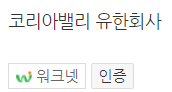
- 다른 구직 사이트에서 가져와 인증이 써있지 않은 사이트는 출력 불가능
→ html 태그와 형식이 달라서 그런거 같음

    - 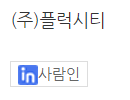
- 결과(CSV 파일 저장)
    - 50개씩 35페이지 = 1,750개(이 중 워크넷 인증으로 되어 있는 것만 추출 ⇒ 약 443개)

# 사람인
- 전체 채용 정보 내용과 다르게 나옴
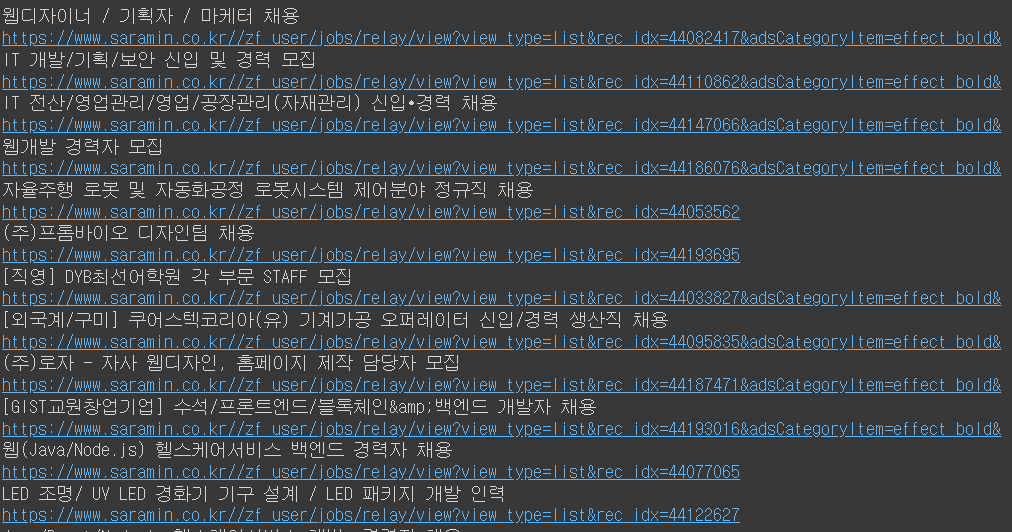
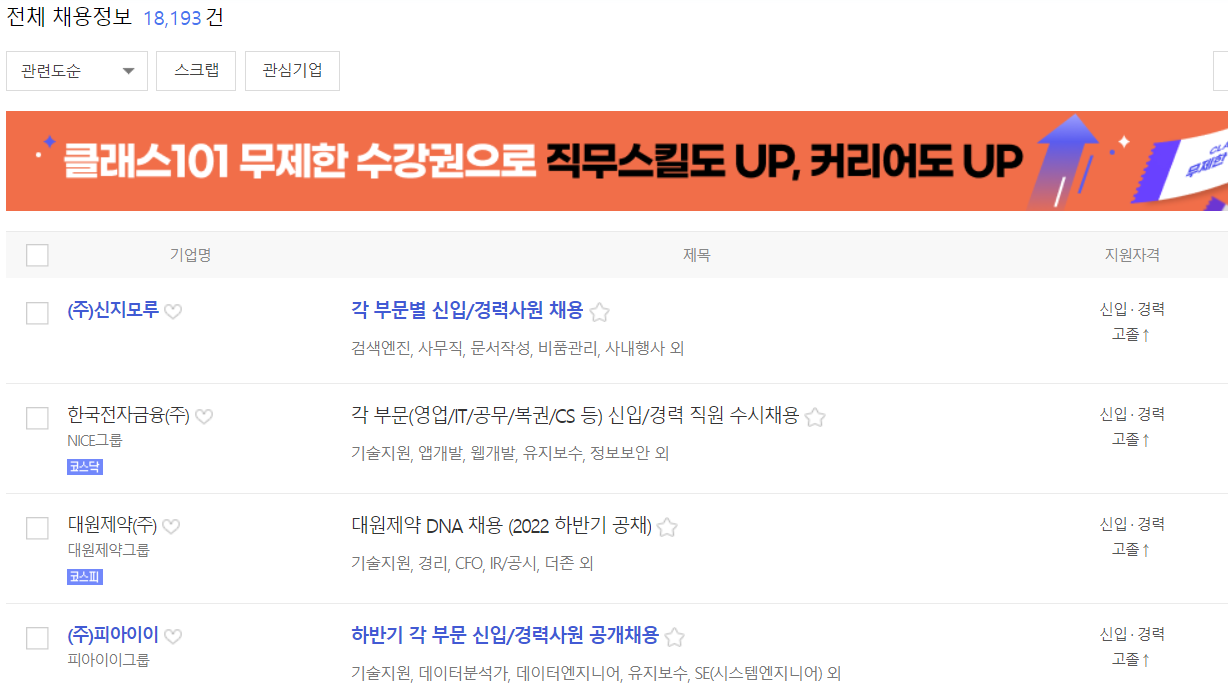
- 결과의 경로가 안들어가짐(아래 사진 참고)
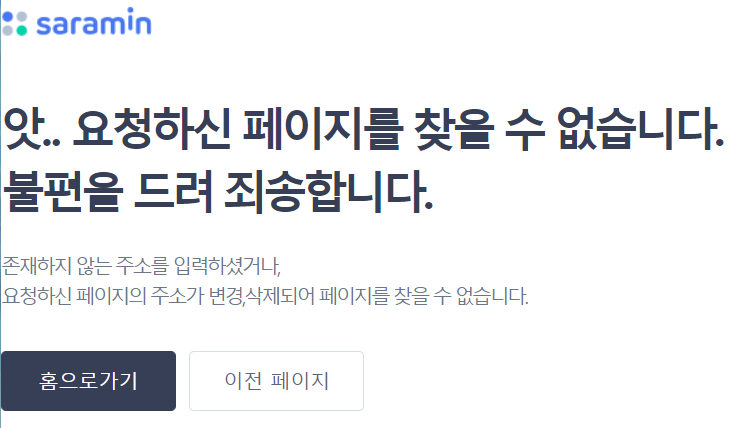